-----------------------------------------------------DIABETES PREDICTION 🩺🔍📊🧬🍩➡️📉--------------------------------------------------------

#### EXECUTIVE SUMMARY AND PROJECT OBJECTIVE : 

#### DATA SOURCE :

The data use in this project is open source and it was gotten from github repository though KAGGLE, here is a link to the data (https://github.com/plotly/datasets/blob/master/diabetes.csv).

#### PACKAGES :

In [8]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



# Control how warnings are displayed
warnings.simplefilter("ignore")

#### IMPORTING THE DATASET :

In [11]:
Diabetes_df = pd.read_csv('diabetes.csv')


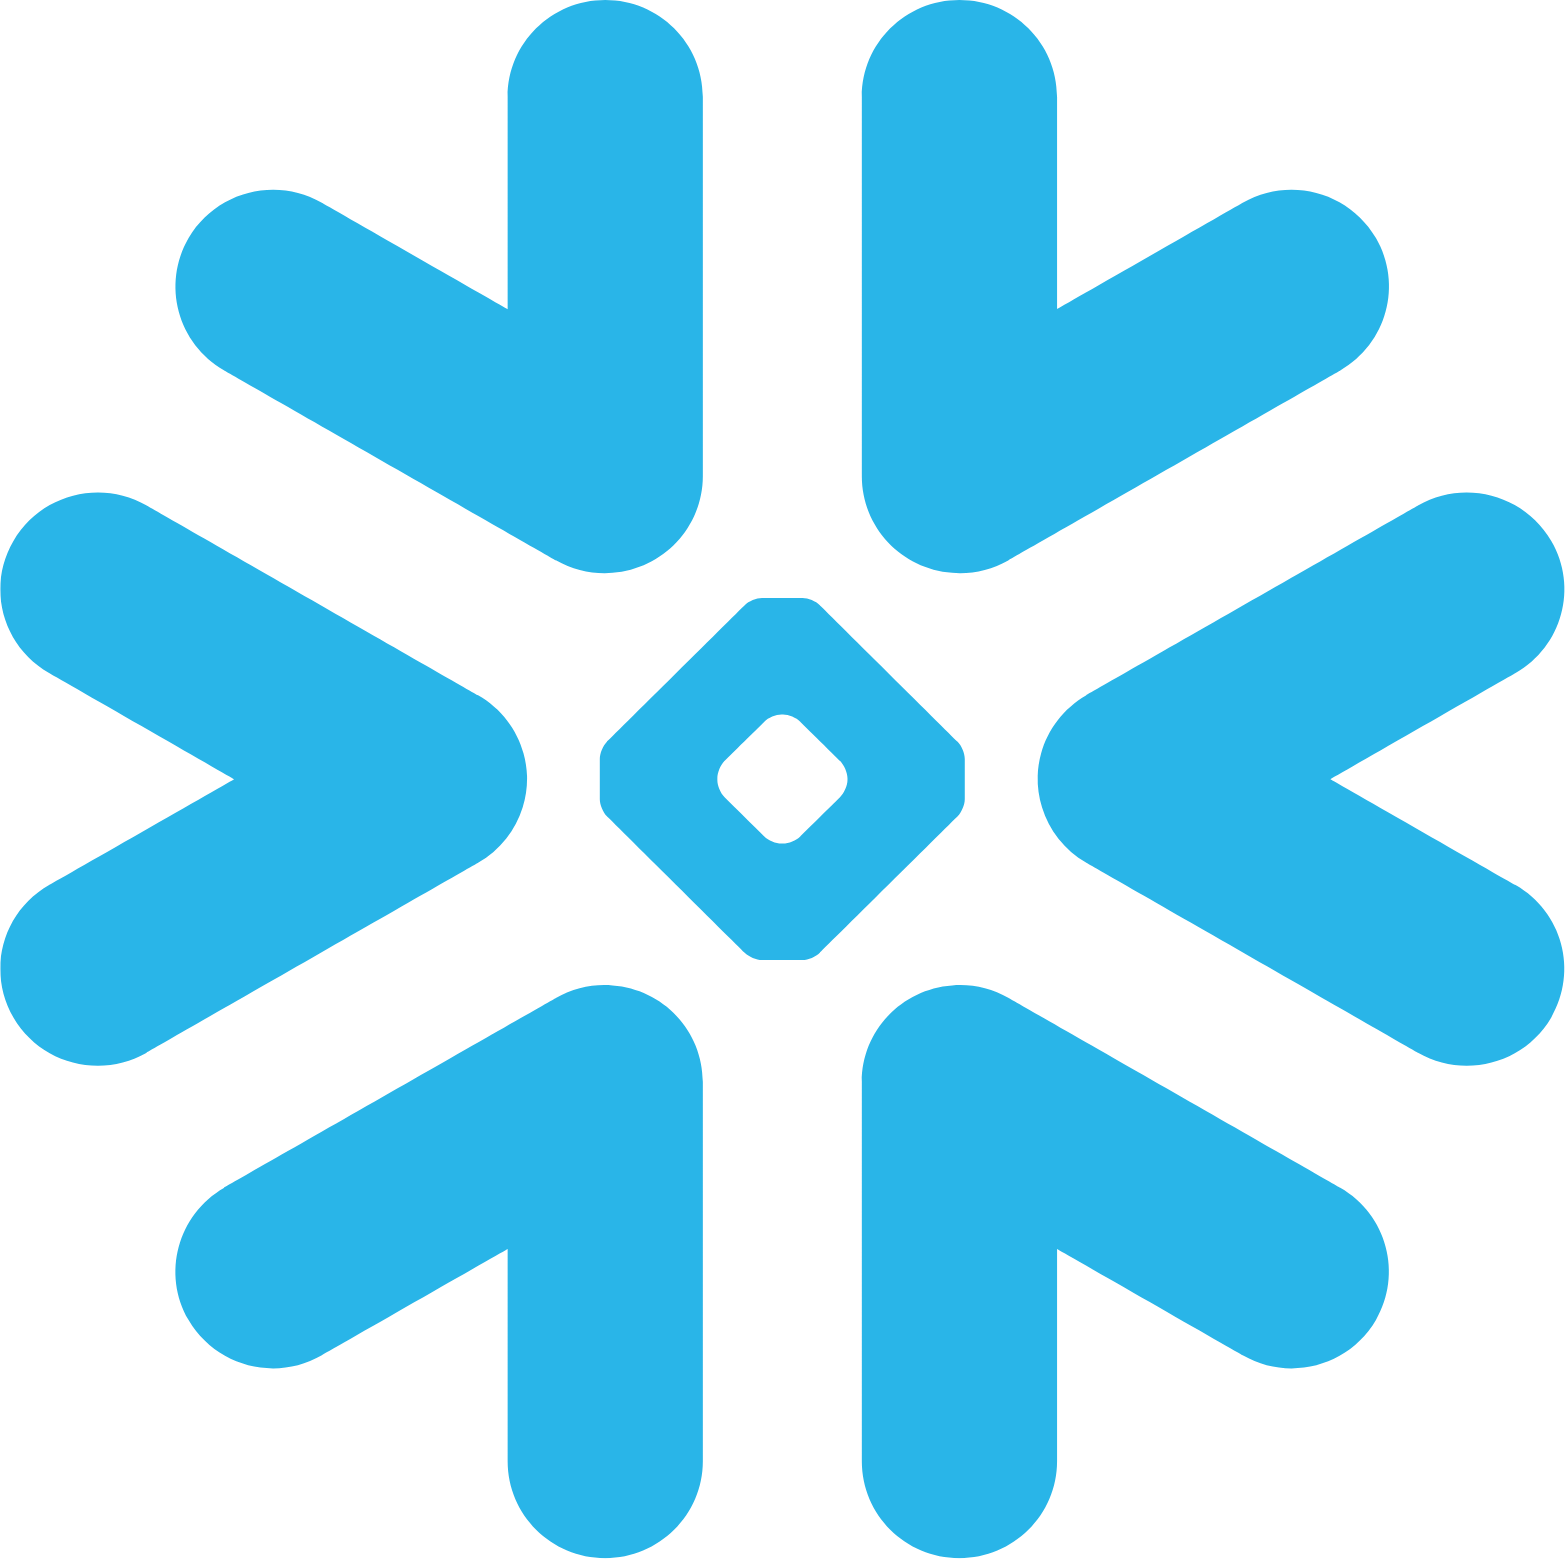

In [12]:
Diabetes_df.head(15)

##### DATA DESCRIPTORS : 

- Pregnancies: Number of times the patient has been pregnant.
- Glucose: Plasma glucose concentration (mg/dL)
- BloodPressure: Diastolic blood pressure (mm Hg)
- SkinThickness: Triceps skinfold thickness (mm)
- Insulin: 2-Hour serum insulin (mu U/ml)
- BMI	Body Mass Index:  (weight in kg/(height in m)^2)
- DiabetesPedigreeFunction: Diabetes likelihood score based on family history
- Age: Age of the patient (years)
- Outcome: Diabetes outcome (0 = non-diabetic, 1 = diabetic)

##### A. DATA QAULITY ASSESSMENT : 

In this section, we will conduct a preliminary data quality assessment by checking for missing values, detecting outliers, identifying inconsistent values, and spotting duplicate records. To minimize the risk of data leakage, extensive data wrangling will be deferred to the model development phase. At this stage, we aim to gain an initial understanding of data integrity without performing any transformations that could bias the modeling process.

##### A.1.0 Check for missing values :

In [21]:
Diabetes_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

A preliminary check for missing values across all features indicates that there are no missing entries in the dataset. Each variable, including Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, and Outcome, contains complete data, ensuring a consistent and reliable foundation for further analysis.

##### A.1.1 Check for duplicated rows:

In [25]:
Diabetes_df.duplicated().sum()

0

A check for duplicate records using the .duplicated() method confirms that there are no duplicate entries in the dataset. This indicates that all observations are unique, which supports data integrity and ensures the reliability of subsequent analysis.

##### A.1.1 Check for outliers:

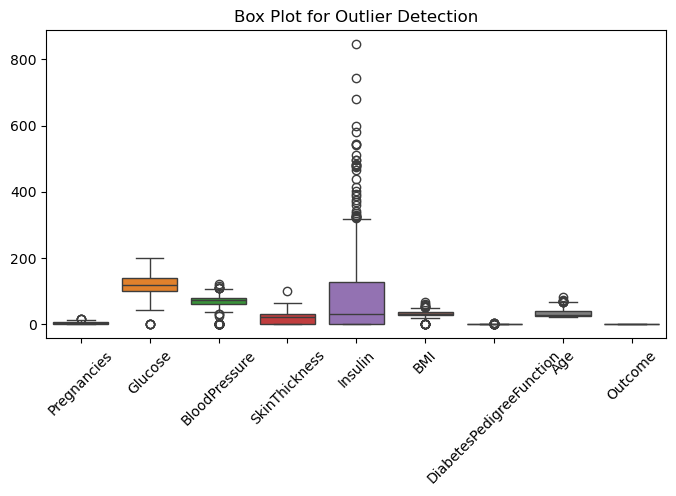

In [29]:
# Create box plots for the entire DataFrame
plt.figure(figsize=(8, 4))
sns.boxplot(data=Diabetes_df)

# Display the plot
plt.title('Box Plot for Outlier Detection')
plt.xticks(rotation=45)  # Rotate column names for better visibility
plt.show()

- Pregnancies: Outliers are present above ~10, indicating unusually high pregnancy counts.
- Glucose: No clear outliers; most values cluster tightly around the median.
- BloodPressure: Outliers exist below ~40 and above ~100, suggesting abnormal blood pressure readings.
- SkinThickness: Outliers appear above ~60, indicating unusually thick skin measurements.
- Insulin: Numerous outliers are evident above ~400, with extreme values nearing 800, suggesting highly elevated insulin levels.
- BMI: Outliers are present above ~50, indicating extreme body mass indices.
- DiabetesPedigreeFunction: Outliers occur above ~1.5, reflecting unusually high genetic predisposition scores.
- Age: Outliers are seen above ~60, indicating older individuals in the dataset.
- Outcome: No outliers.
  
Overall, Insulin shows the most pronounced outliers, followed by Pregnancies, SkinThickness, and DiabetesPedigreeFunction.

##### A.1.2 Check for inconsistent values in features:

In [33]:
Diabetes_df['Outcome'].unique()

array([1, 0], dtype=int64)

In [35]:
Diabetes_df['Age'].unique()

array([50, 31, 32, 21, 33, 30, 26, 29, 53, 54, 34, 57, 59, 51, 27, 41, 43,
       22, 38, 60, 28, 45, 35, 46, 56, 37, 48, 40, 25, 24, 58, 42, 44, 39,
       36, 23, 61, 69, 62, 55, 65, 47, 52, 66, 49, 63, 67, 72, 81, 64, 70,
       68], dtype=int64)

In [36]:
Diabetes_df['DiabetesPedigreeFunction'].unique()

array([0.627, 0.351, 0.672, 0.167, 2.288, 0.201, 0.248, 0.134, 0.158,
       0.232, 0.191, 0.537, 1.441, 0.398, 0.587, 0.484, 0.551, 0.254,
       0.183, 0.529, 0.704, 0.388, 0.451, 0.263, 0.205, 0.257, 0.487,
       0.245, 0.337, 0.546, 0.851, 0.267, 0.188, 0.512, 0.966, 0.42 ,
       0.665, 0.503, 1.39 , 0.271, 0.696, 0.235, 0.721, 0.294, 1.893,
       0.564, 0.586, 0.344, 0.305, 0.491, 0.526, 0.342, 0.467, 0.718,
       0.962, 1.781, 0.173, 0.304, 0.27 , 0.699, 0.258, 0.203, 0.855,
       0.845, 0.334, 0.189, 0.867, 0.411, 0.583, 0.231, 0.396, 0.14 ,
       0.391, 0.37 , 0.307, 0.102, 0.767, 0.237, 0.227, 0.698, 0.178,
       0.324, 0.153, 0.165, 0.443, 0.261, 0.277, 0.761, 0.255, 0.13 ,
       0.323, 0.356, 0.325, 1.222, 0.179, 0.262, 0.283, 0.93 , 0.801,
       0.207, 0.287, 0.336, 0.247, 0.199, 0.543, 0.192, 0.588, 0.539,
       0.22 , 0.654, 0.223, 0.759, 0.26 , 0.404, 0.186, 0.278, 0.496,
       0.452, 0.403, 0.741, 0.361, 1.114, 0.457, 0.647, 0.088, 0.597,
       0.532, 0.703,

In [37]:
Diabetes_df['BMI'].unique()

array([33.6, 26.6, 23.3, 28.1, 43.1, 25.6, 31. , 35.3, 30.5,  0. , 37.6,
       38. , 27.1, 30.1, 25.8, 30. , 45.8, 29.6, 43.3, 34.6, 39.3, 35.4,
       39.8, 29. , 36.6, 31.1, 39.4, 23.2, 22.2, 34.1, 36. , 31.6, 24.8,
       19.9, 27.6, 24. , 33.2, 32.9, 38.2, 37.1, 34. , 40.2, 22.7, 45.4,
       27.4, 42. , 29.7, 28. , 39.1, 19.4, 24.2, 24.4, 33.7, 34.7, 23. ,
       37.7, 46.8, 40.5, 41.5, 25. , 25.4, 32.8, 32.5, 42.7, 19.6, 28.9,
       28.6, 43.4, 35.1, 32. , 24.7, 32.6, 43.2, 22.4, 29.3, 24.6, 48.8,
       32.4, 38.5, 26.5, 19.1, 46.7, 23.8, 33.9, 20.4, 28.7, 49.7, 39. ,
       26.1, 22.5, 39.6, 29.5, 34.3, 37.4, 33.3, 31.2, 28.2, 53.2, 34.2,
       26.8, 55. , 42.9, 34.5, 27.9, 38.3, 21.1, 33.8, 30.8, 36.9, 39.5,
       27.3, 21.9, 40.6, 47.9, 50. , 25.2, 40.9, 37.2, 44.2, 29.9, 31.9,
       28.4, 43.5, 32.7, 67.1, 45. , 34.9, 27.7, 35.9, 22.6, 33.1, 30.4,
       52.3, 24.3, 22.9, 34.8, 30.9, 40.1, 23.9, 37.5, 35.5, 42.8, 42.6,
       41.8, 35.8, 37.8, 28.8, 23.6, 35.7, 36.7, 45

In [38]:
Diabetes_df['Insulin'].unique()

array([  0,  94, 168,  88, 543, 846, 175, 230,  83,  96, 235, 146, 115,
       140, 110, 245,  54, 192, 207,  70, 240,  82,  36,  23, 300, 342,
       304, 142, 128,  38, 100,  90, 270,  71, 125, 176,  48,  64, 228,
        76, 220,  40, 152,  18, 135, 495,  37,  51,  99, 145, 225,  49,
        50,  92, 325,  63, 284, 119, 204, 155, 485,  53, 114, 105, 285,
       156,  78, 130,  55,  58, 160, 210, 318,  44, 190, 280,  87, 271,
       129, 120, 478,  56,  32, 744, 370,  45, 194, 680, 402, 258, 375,
       150,  67,  57, 116, 278, 122, 545,  75,  74, 182, 360, 215, 184,
        42, 132, 148, 180, 205,  85, 231,  29,  68,  52, 255, 171,  73,
       108,  43, 167, 249, 293,  66, 465,  89, 158,  84,  72,  59,  81,
       196, 415, 275, 165, 579, 310,  61, 474, 170, 277,  60,  14,  95,
       237, 191, 328, 250, 480, 265, 193,  79,  86, 326, 188, 106,  65,
       166, 274,  77, 126, 330, 600, 185,  25,  41, 272, 321, 144,  15,
       183,  91,  46, 440, 159, 540, 200, 335, 387,  22, 291, 39

In [39]:
Diabetes_df['SkinThickness'].unique()

array([35, 29,  0, 23, 32, 45, 19, 47, 38, 30, 41, 33, 26, 15, 36, 11, 31,
       37, 42, 25, 18, 24, 39, 27, 21, 34, 10, 60, 13, 20, 22, 28, 54, 40,
       51, 56, 14, 17, 50, 44, 12, 46, 16,  7, 52, 43, 48,  8, 49, 63, 99],
      dtype=int64)

In [41]:
Diabetes_df['BloodPressure'].unique()

array([ 72,  66,  64,  40,  74,  50,   0,  70,  96,  92,  80,  60,  84,
        30,  88,  90,  94,  76,  82,  75,  58,  78,  68, 110,  56,  62,
        85,  86,  48,  44,  65, 108,  55, 122,  54,  52,  98, 104,  95,
        46, 102, 100,  61,  24,  38, 106, 114], dtype=int64)

In [42]:
Diabetes_df['Glucose'].unique()

array([148,  85, 183,  89, 137, 116,  78, 115, 197, 125, 110, 168, 139,
       189, 166, 100, 118, 107, 103, 126,  99, 196, 119, 143, 147,  97,
       145, 117, 109, 158,  88,  92, 122, 138, 102,  90, 111, 180, 133,
       106, 171, 159, 146,  71, 105, 101, 176, 150,  73, 187,  84,  44,
       141, 114,  95, 129,  79,   0,  62, 131, 112, 113,  74,  83, 136,
        80, 123,  81, 134, 142, 144,  93, 163, 151,  96, 155,  76, 160,
       124, 162, 132, 120, 173, 170, 128, 108, 154,  57, 156, 153, 188,
       152, 104,  87,  75, 179, 130, 194, 181, 135, 184, 140, 177, 164,
        91, 165,  86, 193, 191, 161, 167,  77, 182, 157, 178,  61,  98,
       127,  82,  72, 172,  94, 175, 195,  68, 186, 198, 121,  67, 174,
       199,  56, 169, 149,  65, 190], dtype=int64)

In [43]:
Diabetes_df['Pregnancies'].unique()

array([ 6,  1,  8,  0,  5,  3, 10,  2,  4,  7,  9, 11, 13, 15, 17, 12, 14],
      dtype=int64)

Upon comprehensive analysis of each feature in the dataset as seen above, it is evident that all values within each feature are consistently of the same data type and formatted correctly, ensuring data integrity and suitability for further analysis.

##### CONCLUDSION FROM DATA QAULITY ASSESSMENT :

During the data quality assessment phase, the following observations were noted:

- No duplicate records were identified in the dataset, confirming data uniqueness.
- Outliers were detected in certain features, indicating potential anomalies.
- All values were verified to be in the correct format and data type, ensuring consistency.
- No immediate actions were taken to address outliers or missing values to prevent data leakage and contamination. These will be handled during the cross-validation stage of model development to maintain data integrity.

##### B. EXPLORATORY DATA ANALYSIS :

In this section of the project, an exploratory data analysis (EDA) is conducted on the diabetes.csv dataset to gain meaningful insights into the data. The analysis involves identifying underlying patterns, as well as trends and relationships between featuues. This step is essential, as it not only facilitates smoother preprocessing but also informs strategic decisions regarding the selection and development of appropriate machine learning models.

##### B.1.0 Dataframe Information :

In [56]:
Diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


From above information of the diabetes dataset : 
- The dataframe has 768 entries and 9 features/variable. 
- DiabetesPedigreeFunction and BMI are of type float64. 
- Pregnancies, Glucose,  BloodPressure, SkinThickness, Insulin, Age and Outcome are of type int64.
- The dataframe is complete just as seen in the data qaulity assessment phase. 

##### B1.1 Exploratory Statistical Summary:


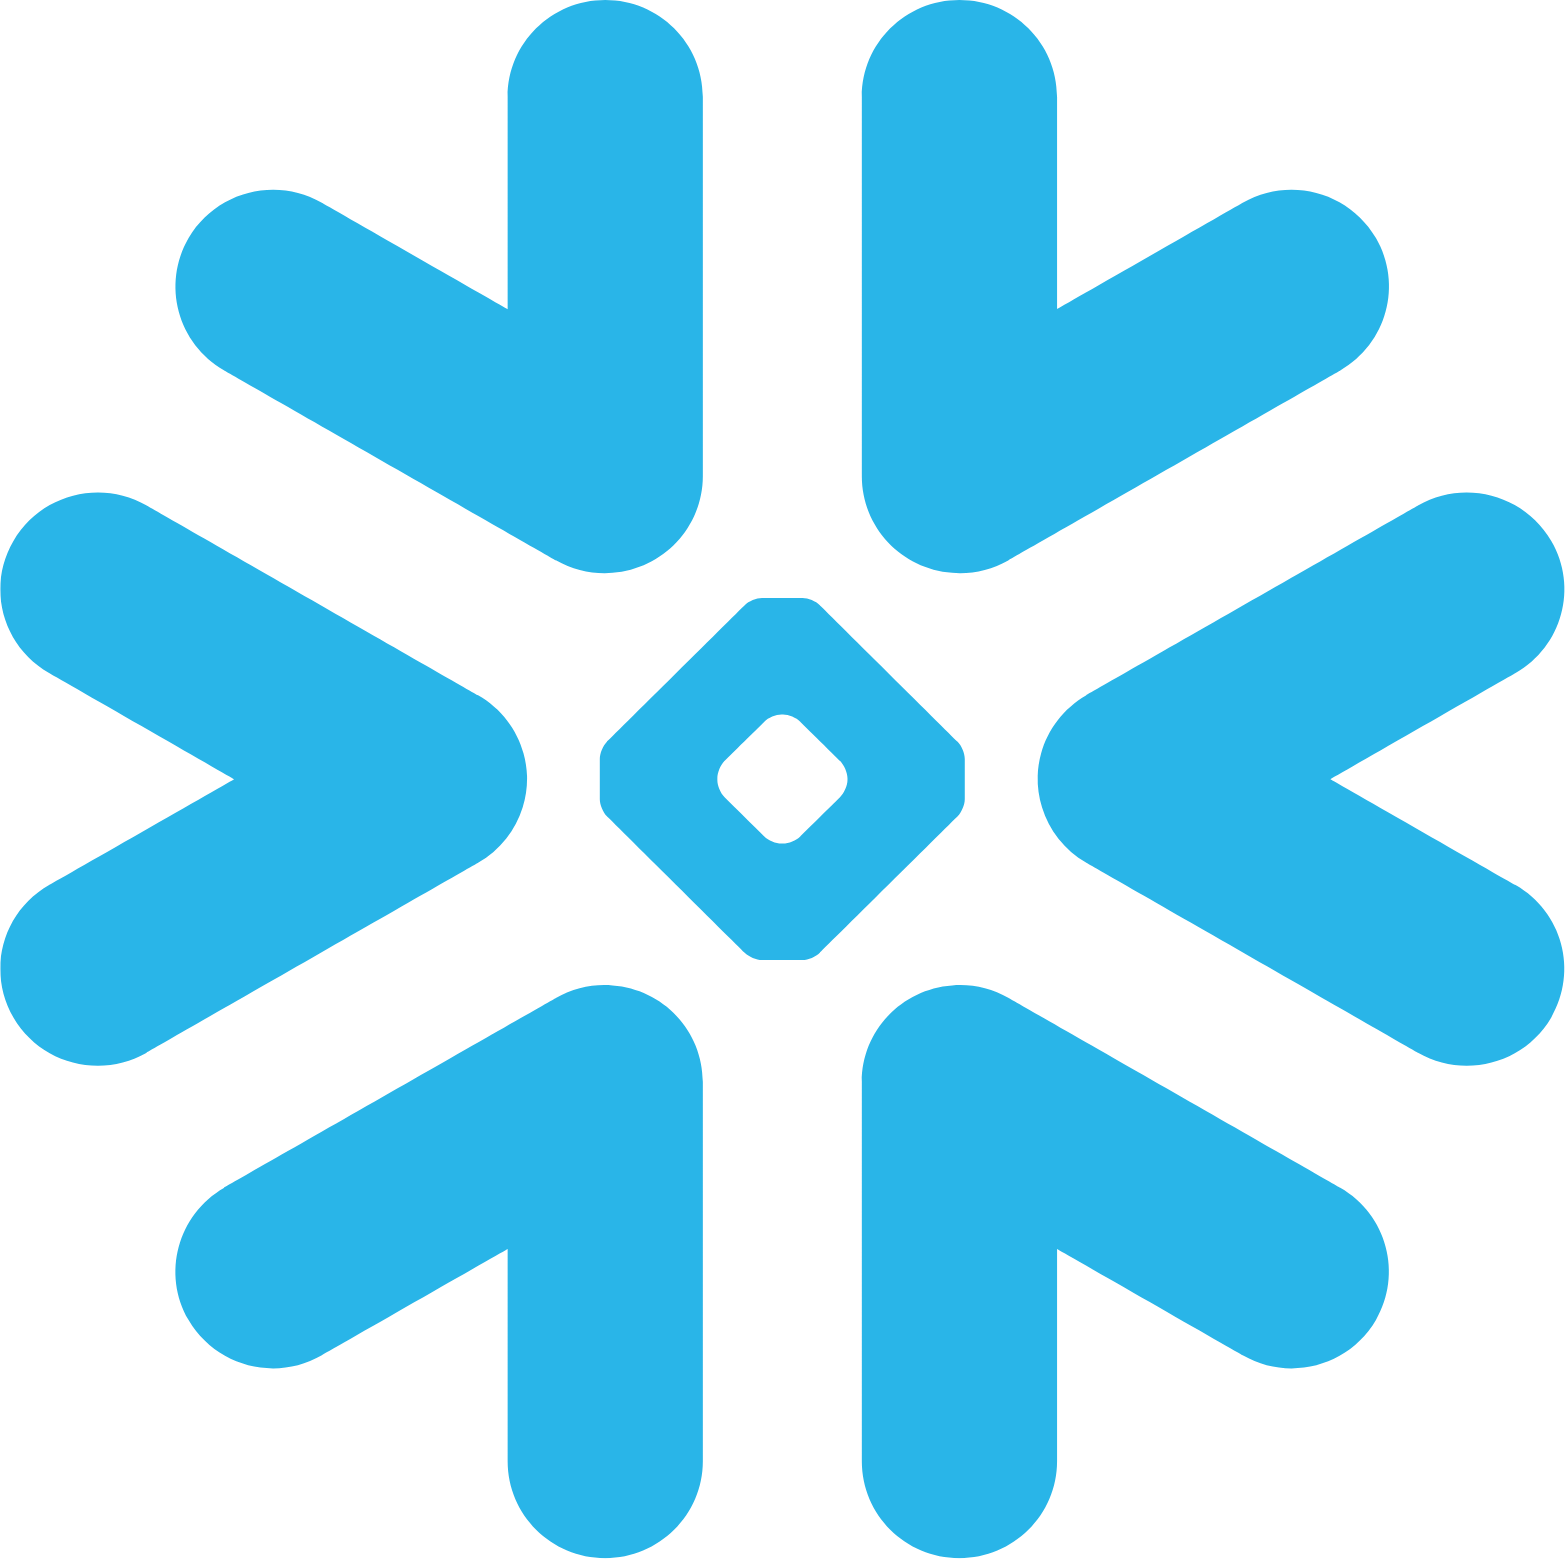

In [62]:
Diabetes_df.describe()

1. Central Tendencies & Distributions : 

- Pregnancies: The average number of pregnancies is approximately 3.85, with values ranging from 0 to 17, suggesting a right-skewed distribution with a few higher counts.
- Glucose: The mean glucose level is 120.89, with a minimum value of 0, which is clinically implausible and likely represents a missing or erroneous entry.
- BloodPressure: The average diastolic blood pressure is 69.11, with a minimum of 0, again indicating potential data quality issues.
- SkinThickness and Insulin also show minimum values of 0, which are not physiologically meaningful and likely indicate missing data encoded as zero.
- BMI (Body Mass Index): The average BMI is 31.99, which falls within the overweight to obese range. A minimum of 0 is unrealistic, suggesting data inconsistency.
- Diabetes Pedigree Function: This metric ranges from 0.08 to 2.42, with a mean of 0.47, reflecting variability in genetic predisposition to diabetes.
- Age: The age of participants ranges from 21 to 81, with a mean of 33.24, indicating a relatively young to middle-aged cohort.
- Outcome: This binary feature has a mean of 0.35, indicating that roughly 35% of the participants are classified as diabetic (1), and 65% are non-diabetic (0).
These should be further investigated and possibly imputed or excluded, as they can significantly impact model performance and bias the analysis.

2. Potential Data Quality Issues :

Several features contain zero values that are not clinically valid, such as:

- Glucose
- BloodPressure
- SkinThickness
- Insulin
- BMI

3. Variability and Outliers: 

- Insulin exhibits high variability with a standard deviation of 115.24 and a maximum value of 846, indicating potential outliers.
- Pregnancies also shows considerable spread (std = 3.37) relative to its mean.
- Features like DiabetesPedigreeFunction and Age have moderate dispersion, but no extreme anomalies based on their respective ranges

##### B1.2 Dataset Dimensions

In [68]:
Diabetes_df.shape

(768, 9)

As seen above , the dataframe has 768 observation and 9 features. 

##### B1.3 Feature Correlation Matrix :

In [73]:
def corre_heatmap(dataframe):
    correlation_matrix = dataframe.corr()
    # Set the size of the graph
    plt.figure(figsize=(8, 4))
    # Create a heatmap
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    # Add title
    plt.title('Correlation Heatmap')
    plt.show()

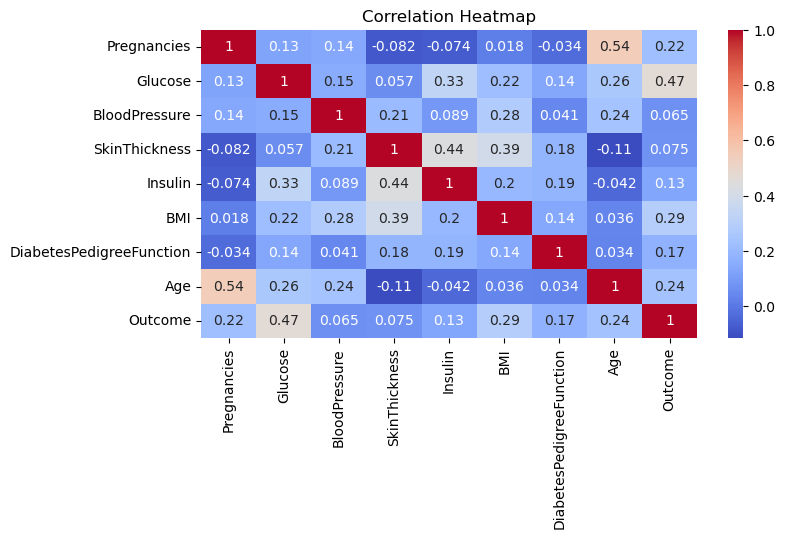

In [74]:
corre_heatmap(Diabetes_df)

The correlation matrix for the diabetes dataset reveals key relationships among features:

- Glucose has the strongest positive correlation with Outcome (0.47), followed by BMI (0.29), indicating their importance in diabetes prediction.
- Age and Pregnancies are strongly correlated (0.54), while SkinThickness and Insulin show moderate correlations with each other (0.44) and BMI (0.39).
- DiabetesPedigreeFunction has weak correlations with most features (e.g., 0.17 with Outcome).
- Weak negative correlations exist, such as SkinThickness with Age (-0.11) and Insulin with Pregnancies (-0.074). Overall, Glucose and BMI are key predictors, while weak correlations suggest multivariate models are needed for accurate analysis.

##### B.1.4 Frequency Distribution Chart: 

In [81]:
def plot_histograms_and_box_plots(numeri_col):
    num_cols = len(numeri_col.columns)

    # Set up subplots
    fig, axes = plt.subplots(nrows=2, ncols=num_cols, figsize=(20, 8))
    fig.suptitle('Histograms and Box Plots')

    # Plot histograms and box plots
    for i, col in enumerate(numeri_col.columns):
        # Histogram
        sns.histplot(numeri_col[col], bins=20, kde=True, ax=axes[0, i])
        axes[0, i].set_title(f'{col} - Histogram')

        # Box plot
        sns.boxplot(x=numeri_col[col], ax=axes[1, i])
        axes[1, i].set_title(f'{col} - Box Plot')

    # Adjust layout
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

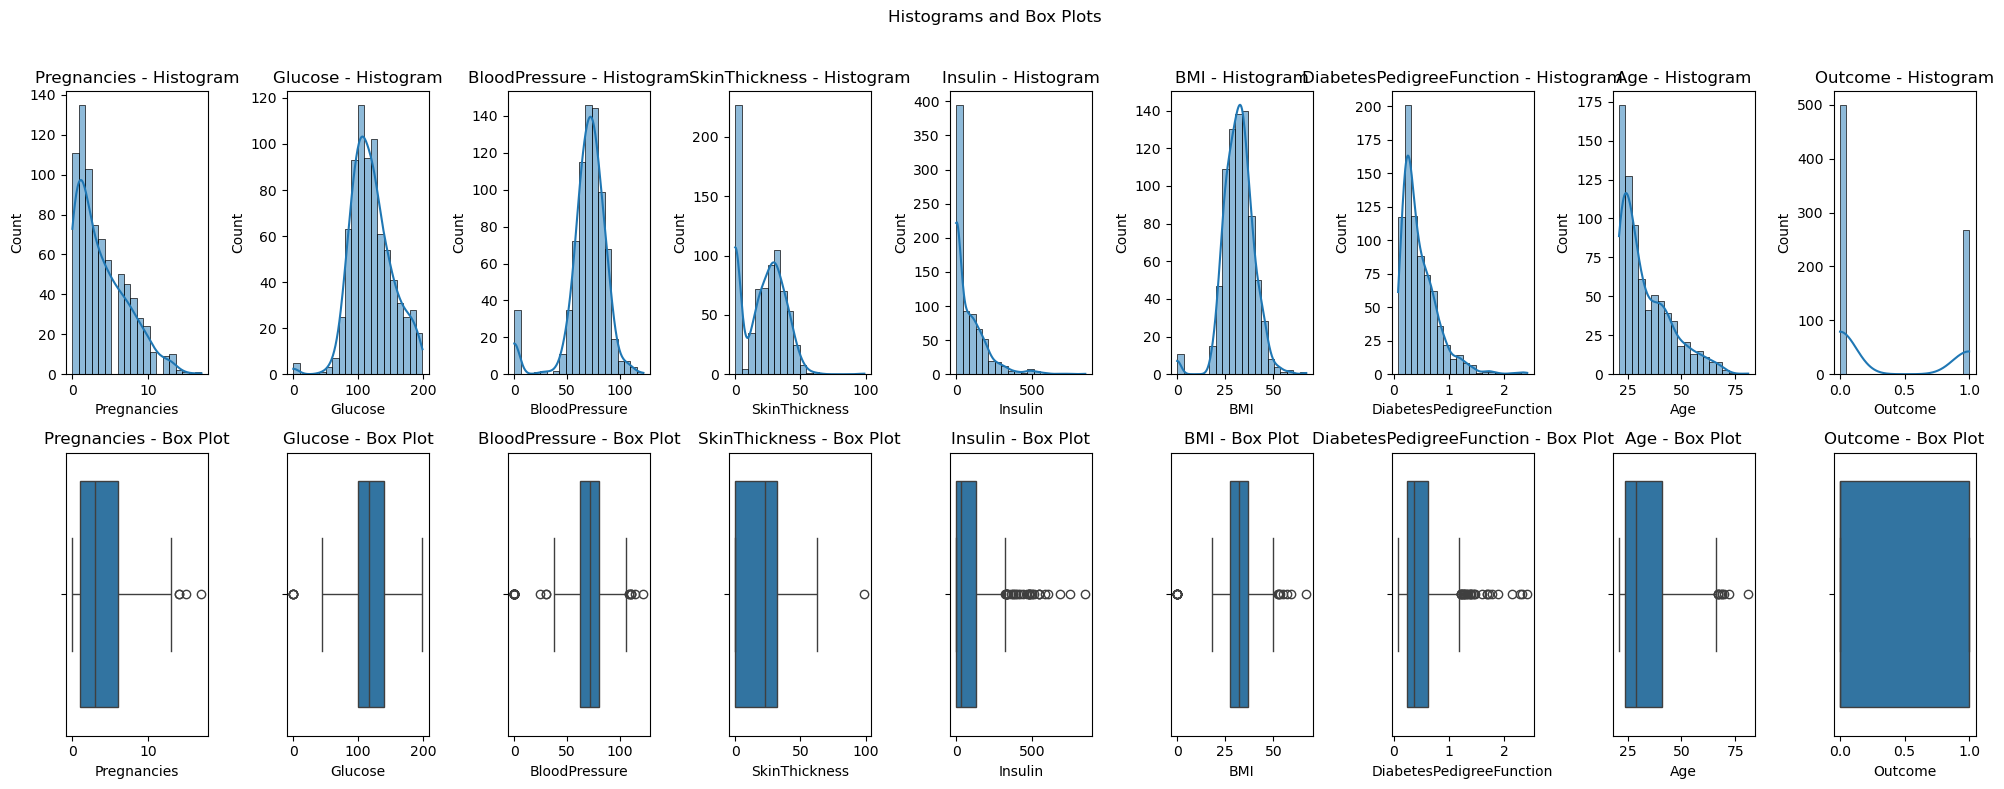

In [82]:
plot_histograms_and_box_plots(Diabetes_df)

1. Pregnancies:
- Histogram: Most individuals have 0–5 pregnancies, with a peak around 0–1. The distribution is right-skewed, with fewer people having more pregnancies (up to 15).
- Box Plot: The median is around 2–3 pregnancies. The interquartile range (IQR) spans roughly 1 to 5, with outliers beyond 10 pregnancies.
2. Glucose:
- Histogram: Glucose levels are roughly normally distributed, peaking around 100–120 mg/dL. Some values extend to 0 and up to 200, indicating potential outliers or extreme cases (e.g., hypoglycemia or hyperglycemia).
- Box Plot: The median is around 110–120. The IQR spans roughly 90 to 140, with outliers below 50 and above 180.
3. BloodPressure:
- Histogram: Blood pressure values peak around 60–80 mmHg, with a slight right skew. Some values are 0 (likely missing or erroneous data) and extend to 120.
- Box Plot: Median is around 70–80. The IQR spans roughly 60 to 90, with outliers below 40 and above 100.
4. SkinThickness:
- Histogram: Highly right-skewed, with a peak near 0 (possibly missing data) and most values between 0–40 mm. A few extend to 100.
- Box Plot: Median is around 20–25. The IQR spans 0 to 35, with outliers above 60.
5. Insulin:
- Histogram: Strongly right-skewed, with a peak near 0 (possibly missing data) and most values between 0–200 µU/mL. Some extend to 800.
- Box Plot: Median is around 50–100. The IQR spans 0 to 150, with many outliers above 300.
6. BMI:
- Histogram: Roughly normally distributed, peaking around 30–35 kg/m². Values range from 0 to 60, with a slight right skew.
- Box Plot: Median is around 30–35. The IQR spans 25 to 40, with outliers below 15 and above 50.
7. DiabetesPedigreeFunction:
- Histogram: Right-skewed, with most values between 0–1. A few extend to 2.5, indicating a higher genetic predisposition to diabetes.
- Box Plot: Median is around 0.3–0.4. The IQR spans 0.2 to 0.6, with outliers above 1.2.
8. Age:
- Histogram: Right-skewed, with a peak around 20–30 years. Most individuals are under 50, with a few up to 80.
- Box Plot: Median is around 30. The IQR spans 25 to 45, with outliers above 65.
9. Outcome:
- Histogram: Binary variable (0 or 1), likely indicating diabetes diagnosis (0 = no, 1 = yes). More individuals have 0 (no diabetes) than 1.
- Box Plot: Since this is binary, the box plot shows the median at 0, with the IQR spanning 0 to 1. No outliers since values are only 0 or 1.

##### CONCLUDSION FROM EXPLORATORY DATA ANALYSIS :

From the above Exploratory data Analysis : 
- The dataframe has 768 entries and 9 features/variable, all numeric data type.
- The dataframe is complete with no missing value.
- Features like Glucose, BloodPressure, SkinThickness, Insulin and BMI has 0 value with is clinically invalid.
- There exist relationships between the features with lucose has the strongest positive correlation with Outcome (0.47).
- Most features are not normally distributed because of the presence of ouliers as already observed in the data assessment section.

#### C. MODEL DEVELOPMENT: HANDLING OUTLIERS AND MISSING VALUES, DATA NORMALIZATION, FEATURE SELECTION, HYPERPARAMETER TUNING VIA GRID SEARCH, AND PREVENTION OF DATA LEAKAGE

##### C.1.0 Fixing columns with invalid values, that is 0 -> NAN :

In [91]:
Diabetes_df_copy = Diabetes_df.copy() 

In [92]:
columns_to_change = ['Glucose' , 'BloodPressure' , 'SkinThickness' , 'Insulin' , 'BMI']

In [93]:
# Replace 0 with NaN in those columns
Diabetes_df_copy[columns_to_change] = Diabetes_df_copy[columns_to_change].replace(0, np.nan)

In [94]:
Diabetes_df_copy.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

##### D. DEPLOYMENT OF MODEL IN STREAMLIT APPLICATION. 